# Übung 1 - Visualisierung von Biosignalen
***

**Name:** NICHT VERGESSEN!
<br>
**Matr.-Nr.:** NICHT VERGESSEN!

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 15.04.2019
<br>
**Abgabe:** So, 05.05.2019, 23:59 Uhr

---

## Aufgabenbeschreibung

Die *Elektroenzephalografie (EEG)* ist eine wichtige Methode zur medizinischen Diagnostik. Mittels EEG lässt sich die summierte elektrische Aktivität des Gehirns messen. Auf Basis der Messung und einer geeigneten Visualisierung der Messdaten können wichtige Erkenntnisse zur Diagnose und Therapie aber auch zu Forschungszwecken gewonnen werden.

In der Regel wird das gemessene EEG-Signal vor einer Visualisierung in mehrere Frequenzbänder (Wellenlängenbereiche) eingeteilt und jeweils durch einen eigenen Graphen visualisiert. Historisch sind dies:
- Delta-Wellen (0,1 bis <4 Hz)
- Theta-Wellen (4 bis <8 Hz)
- Alpha-Wellen (8 bis <13 Hz)
- Beta-Wellen (13 bis <30 Hz)

Ziel dieser Übung ist die Einteilung und Visualisierung der vier oben genannten Frequenzbänder für ungefilterte EEG-Messdaten mit Hilfe von Tief- und Bandpassfilter.


**Generelle Hinweise zur Bearbeitung:** 

Für die Visualisierung soll das *matplotlib*-Paket verwendet werden. Alle Diagramme sollen *inline* in diesem Notebook ausgegeben werden. Alle interaktiven Inhalte sollen unter Venwendung der Funktionen des Pakets *ipywidgets* realisiert werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Datei `eeg_data.txt` muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 25% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

***
***

### Aufgaben:

**1. Datenimport**

Importieren Sie die EEG-Messdaten aus der gegebenen Textdatei.

Inhalt der Textdatei ist eine EEG-Zeitserie mit ungefilterten Messdaten.

Die bereitgestellte Datei mit den ungefilterten EEG-Messdaten ist folgender Quelle entnommen:
<http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3> (Set A - Z.zip -- Datei Z001.txt)

Wichtige Hinweise zum Datensatz:
- Samplingrate der Messdaten: 173.61 Hz
- Frequenzmessbereich: 0.5 bis 85 Hz
- 4097 Messpunkte (bei der Quelle sind 4096 Messpunkte angegeben, tätsächlich sind es jedoch 4097)

**Hinweis:** Beachten Sie, welches Datenformat die nachfolgenden Schritte voraussetzen!

Visualisieren Sie die eingelesenen Messdaten in einem Liniendiagramm:

- x-Achse: Zeit in Sekunden
- y-Achse: Signal in $\mu V$

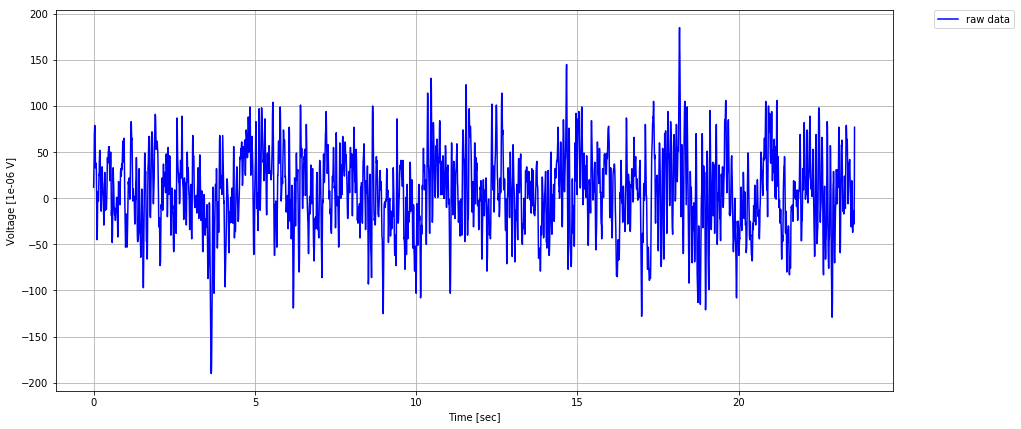

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

raw_data = np.fromfile('eeg_data.txt', dtype=int, sep='\n') #y-Werte
sample_rate = 173.61 #Abtastrate
sample_count = raw_data.size #4097

#x-Werte bzw sample time = Kehrwert der Abtastrate! wichtig: *Abtastpunkteanzahl nicht vergessen!
sample_time = (1/sample_rate)*sample_count

#linspace = X-Werte: 0=start, sampletime=stop, samplecount=anzahlPunkte, endpoint=true stop ist letzter punkt 
time_steps = np.linspace(0, sample_time, sample_count, endpoint=False)

#nun plotten!
plt.figure(figsize=(15, 7))
plt.plot(time_steps, raw_data, 'b-', label='raw data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')
plt.show()

 

**2. Vorverarbeitung**

Filtern Sie die importierten Messdaten mittels Tiefpassfilter zur Reduktion von hochfrequentem Rauschen.

Verwenden Sie zur Realisierung des Tiefpassfilters den *Butterworth*-Filter 2.Ordnung aus dem *SciPy*-Paket:
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html>

Ein lauffähiges Beispiel für einen Butterworth-Tiefpassfilters zur Orientierung finden Sie hier:
<http://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units#25192640> (**Anmerkung:** Die explizite Berechnung und Visualisierung der Frequency Response ist für diese Aufgabe nicht erforderlich)

Die Frequenzgrenze des Tiefpassfilters soll 40 Hz betragen. 

Visualisieren Sie die gefilterten Messdaten in einem separaten Diagramm analog zu **1.**

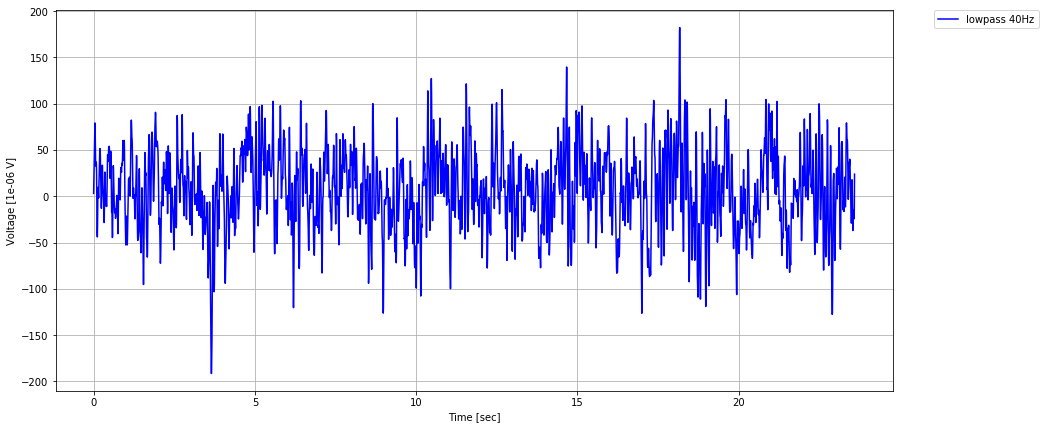

In [2]:
from scipy.signal import butter, lfilter
cutoff =40 #frequezgrenze
order=2 #2.Ordnung

#implementierung des tiefpass-filters
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs #nyquistrate
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a #filterkoeffizienten, mit denen gefiltert werden soll

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order)
    y = lfilter(b, a, data)
    return y

#filterung der daten: tiefpassfilter aufrufen
filtered = butter_lowpass_filter(raw_data, cutoff, sample_rate, order)

#plotten
plt.figure(figsize=(15, 7))
plt.plot(time_steps, filtered, 'b-', label = 'lowpass 40Hz')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')
plt.show()

**3. Anwendung von Bandpassfiltern auf die vorgefilterten Daten**

Teilen Sie die gefilterten Daten aus **2.** durch Verwendung von Bandpassfiltern in die o.g. vier Frequenzbänder
- Delta-Wellen
- Theta-Wellen
- Alpha-Wellen
- Beta-Wellen

ein.

Zur Realisierung der Bandpassfilter sollen ebenfalls *Butterworth*-Filter 2.Ordnung verwendet werden (Link zur Dokumentation siehe bei **2.**)

Visualisieren Sie jeden Frequenzbereich in einem separaten Diagramm. Ordnen Sie die Diagramme untereinander an (siehe hierzu <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot>).

**Hinweis:** Beachten Sie bei den Frequenzgrenzen die Angaben zum Frequenzmessbereich.

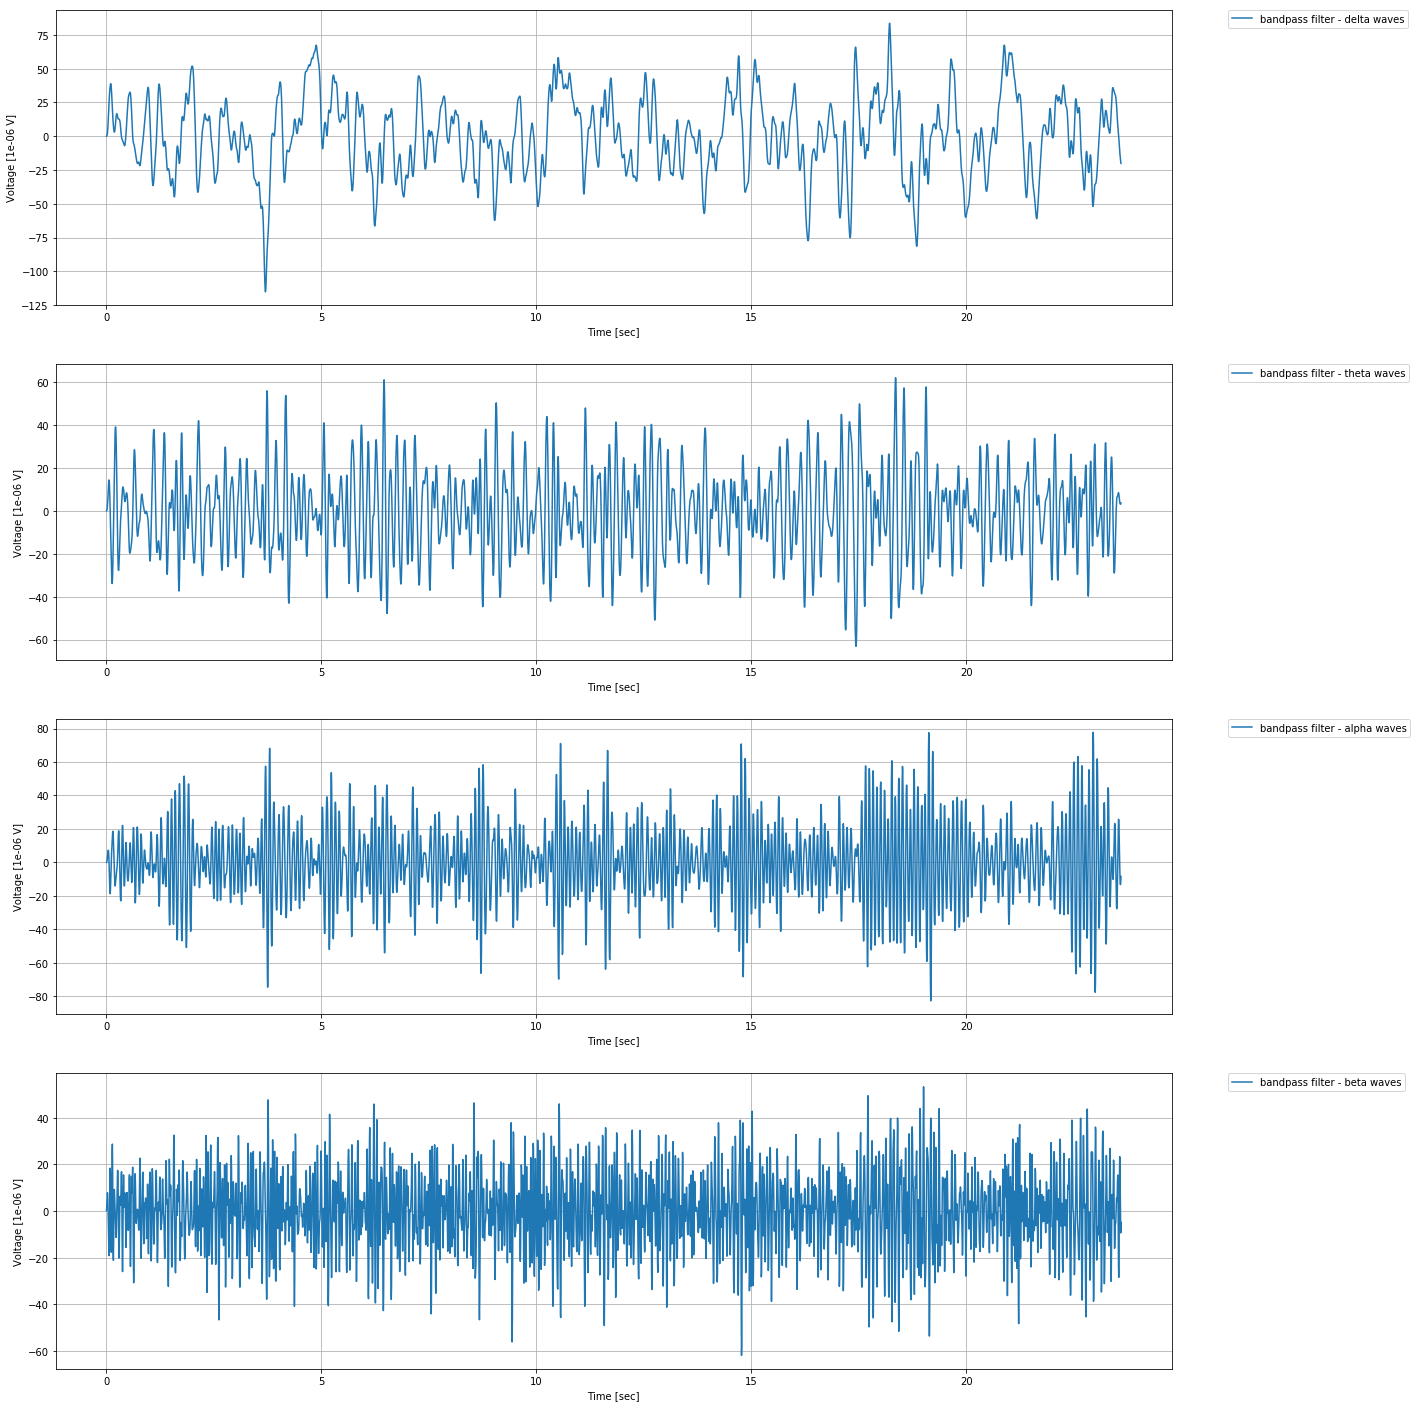

In [3]:
def butter_bandpass(cutoff_low, cutoff_high, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    b, a = butter(order, [normal_cutoff_low, normal_cutoff_high], btype='bandpass', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff_low, cutoff_high, fs, order=2):
    b, a = butter_bandpass(cutoff_low, cutoff_high, fs, order=order)
    y = lfilter(b, a, data)
    return y

# delta-waves
cutoff_low = 0.1
cutoff_high = 4
filtered_delta = butter_bandpass_filter(filtered, cutoff_low, cutoff_high, sample_rate, order)

# theta-waves
cutoff_low = 4
cutoff_high = 8
filtered_theta = butter_bandpass_filter(filtered, cutoff_low, cutoff_high, sample_rate, order)

# alpha-waves
cutoff_low = 8
cutoff_high = 13
filtered_alpha = butter_bandpass_filter(filtered, cutoff_low, cutoff_high, sample_rate, order)

# beta-waves
cutoff_low = 13
cutoff_high = 30
filtered_beta = butter_bandpass_filter(filtered, cutoff_low, cutoff_high, sample_rate, order)



#plotten der resultate:
plt.figure(figsize=(20, 25))

plt.subplot(4, 1, 1)
plt.plot(time_steps, filtered_delta,  label='bandpass filter - delta waves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')

plt.subplot(4, 1, 2)
plt.plot(time_steps, filtered_theta, label='bandpass filter - theta waves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')

plt.subplot(4, 1, 3)
plt.plot(time_steps, filtered_alpha, label='bandpass filter - alpha waves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')

plt.subplot(4, 1, 4)
plt.plot(time_steps, filtered_beta, label='bandpass filter - beta waves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')

plt.show()



**4. Visualisierung aller Datensätze**

Visualisieren sie alle sechs Datensätze aus **1.** - **3.** in einem einzelnen Diagramm. Jeder Datensatz soll über eine separate Farbe visualisiert werden. Sehen Sie für das Diagramm eine Legende vor, welche die Zuordnung der Farben erläutert. Formatieren Sie Ihre Darstellung (z.B. Platzierung der Legende, Wertebereich der y-Achse), so dass keine Daten von der Legende überlagert werden.

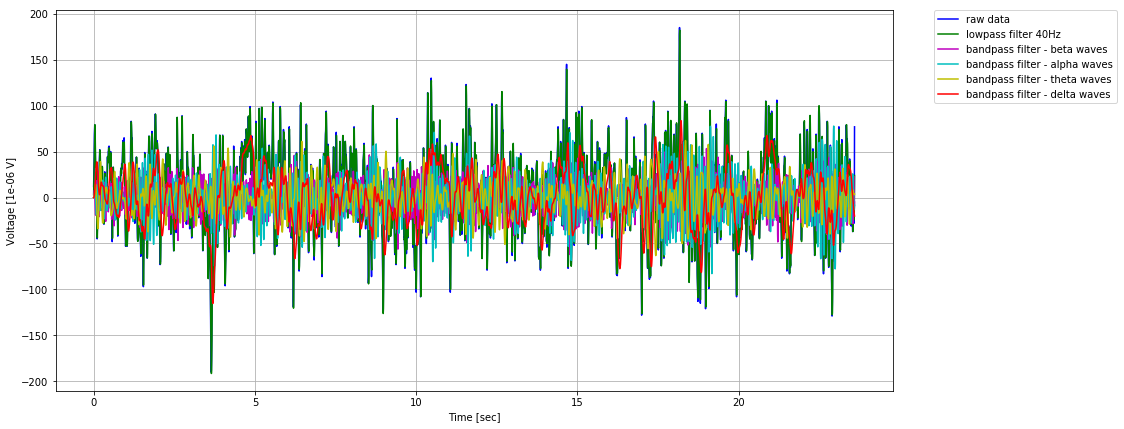

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(time_steps, raw_data, 'b-', label='raw data')
plt.plot(time_steps, filtered, 'g-', label='lowpass filter 40Hz')
plt.plot(time_steps, filtered_beta, 'm-', label='bandpass filter - beta waves')
plt.plot(time_steps, filtered_alpha, 'c-', label='bandpass filter - alpha waves')
plt.plot(time_steps, filtered_theta, 'y-', label='bandpass filter - theta waves')
plt.plot(time_steps, filtered_delta, 'r-', label='bandpass filter - delta waves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [1e-06 V]')
plt.show()

**5. Interaktive Visualisierung mit Auswahl der Frequenzgrenzen und der Filterordnung**

Realisieren Sie eine interaktive Visualisierung zur Festlegung von

- Frequenzgrenzen (jeweils einen separaten Slider für untere und obere Grenze; Frequenzbereich: 0,5 - 30,0 Hz) und
- Filterordnung (2. bis 10. Ordnung als Slider)

für den Bandpassfilter (Eingangsdaten sind die vorgefilterten Daten aus **2.**).

Realisieren Sie ebenfalls eine einfache Fehlerbehandlung (z.B. falls untere Grenze > obere Grenze).

Stellen Sie das Ergebnis des Bandpassfilters in einem Diagramm zusammen mit der Datenreihe aus **2.** dar (inkl. Legende).

**Hinweis:** Bei kleinen Frequenzen und hoher Filterordnung kommt es zu extremen Werten nach der Filterung, die in der  Visualisierung den gesamten Plot beeinflussen. Dies ist *normal* und liegt an der Funktionsweise des Filters. Ihre Lösung sollte für die bereits in **3.** verwendeten Parameter jedoch korrekte Plots erzeugen. 

In [5]:
from ipywidgets import interact
import ipywidgets as widgets 

def interact_bandpass(cutoff_low, cutoff_high, order):
    if cutoff_low > cutoff_high :
        print("Fehler: Die untere Grenze darf nicht Größer sein als die Obere, Grenzen werden auf Default gesetzt.")
        cutoff_low = 0.5
        cutoff_high = 4.0
        
    interact_filtered = butter_bandpass_filter(filtered, cutoff_low, cutoff_high, sample_rate, order)
    
    filtered_label = "bandpass filter " + str(cutoff_low) + "Hz - " + str(cutoff_high) + "Hz, Order: " + str(order)

    plt.figure(figsize=(15, 7))
    plt.plot(time_steps, filtered, 'b-', label = 'lowpass filter 40Hz')
    plt.plot(time_steps, interact_filtered, 'r-', label = filtered_label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('Voltage [1e-06 V]')
    plt.show()

cutoff_low_slider = widgets.FloatSlider(min=0.5,max=30,step=0.1,value=0.5, continuous_update=False)
cutoff_high_slider = widgets.FloatSlider(min=4.0,max=30,step=0.1,value=4.0, continuous_update=False)
order_slider = widgets.IntSlider(min=1,max=10,step=1,value=2, continuous_update=False)

interact(interact_bandpass, cutoff_low=cutoff_low_slider, cutoff_high=cutoff_high_slider, order=order_slider);

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='cutoff_low', max=30.0, min=…